In [1]:
pip install -U numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
from bs4 import BeautifulSoup as bsp
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3

import json
import time
from datetime import datetime, timedelta
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

C:\Users\pc\anaconda3\envs\py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\pc\anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\pc\anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# PYTHON으로 SQLITE3의 DB에 데이터 담기
dbname='20210630_wadizDB_최종.db'
def insData(d, tblname='wadiztable_new'):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select * from '+tblname+' where ncategory="'+d+'"'
        ckkey=cur.execute(sql).fetchall()
        if ckkey:
            return ckkey

In [3]:
def category(d):
    data=insData(d)
    df=pd.DataFrame(data)
    names=['idx','category','title','numofpic','community','news','content','supporter','amount','percent','key']
    df.columns=names
    percentage = 500
    df['label'] = 0
    pd.to_numeric(df['percent'])
    # print(type(percentage))
    # print(type(df['percent'].iloc[0]))

    for i , percent in enumerate(df['percent']):
        percent = int(percent)
        if percent > percentage:
            df['label'].iloc[i] = 1
        else:
            df['label'].iloc[i] = 0
    return df

In [4]:
# https://newbedev.com/utf-8-codec-can-t-decode-byte-0xed-in-position-0-invalid-continuation-byte-code-example

In [4]:
df=category('스포츠·모빌리티')

C:\Users\pc\anaconda3\envs\py37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## 타이틀+컨텐츠

In [5]:
tdf = df.copy()
tdf['text'] = tdf['title'] + tdf['content']
tdf

,idx,category,title,numofpic,community,news,content,supporter,amount,percent,key,label,text
0,1,스포츠·모빌리티,필드를 위한 라이 연습기 모든 경사 아이언부터 3번우드까지 풀 스윙 가능,47,1,1,"\n 평지에서만 연습은 이제 그만, 골프 실력향상을 위한 기존에 경험해 보지 ...",1,0,0,https://cdn.wadiz.kr/ft/images/green001/2021/0...,0,필드를 위한 라이 연습기 모든 경사 아이언부터 3번우드까지 풀 스윙 가능\n ...
1,2,스포츠·모빌리티,내차에 아이언 슈트 그래핀 나노 코팅을 입히다.,55,3,3,"\n 사용후에 도장면을 직접 만져보면, 그 분명한 차이를 경험하게 됩니다. 깊...",47,"6,824,500",1364,https://www.wadiz.kr/web/campaign/detail/119816,1,내차에 아이언 슈트 그래핀 나노 코팅을 입히다. \n 사용후에 도장면을 직접 ...
2,3,스포츠·모빌리티,마사지는 문질러야 제맛. 물리치료사 10년 경력을 담은 마사지기 #스트릭,79,296,16,\n 그동안 마사지하느라 힘드셨죠? 이제 한 손으로 쓱쓱- 문지르기만 하세요....,"2,404","211,831,000",21183,https://www.wadiz.kr/web/campaign/detail/116340,1,마사지는 문질러야 제맛. 물리치료사 10년 경력을 담은 마사지기 #스트릭\n ...
3,4,스포츠·모빌리티,"[골프존] 리얼한 타격, 짜릿한 손맛! 집에서 즐기는 진짜 골프, 비전홈",63,89,20,\n 골프존 노하우로 제대로 빚은 홈 골프시뮬레이터 비전홈! 임팩트볼 기술로 ...,"4,020","822,858,100",27428,https://www.wadiz.kr/web/campaign/detail/116678,1,"[골프존] 리얼한 타격, 짜릿한 손맛! 집에서 즐기는 진짜 골프, 비전홈\n ..."
4,5,스포츠·모빌리티,글로벌17억의 자신감! 새것 같은 유리+수명 긴 와이퍼 [킴블레이드],123,19,2,\n ◈또 한 번 진화한 킴블레이드◈ 서로 상반되는 조건인 부드러운 동작과 ...,954,"59,902,000",599,https://www.wadiz.kr/web/campaign/detail/100949,1,글로벌17억의 자신감! 새것 같은 유리+수명 긴 와이퍼 [킴블레이드]\n ◈또...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,789,스포츠·모빌리티,[쫑아쫑아] 앉아서 다듬는 종아리. 그리고 전신운동과 마사지. 펌프운동!,48,0,6,\n 오래 앉아있는 당신에게! 앉아서 종아리 운동부터 스트레칭. 그 외 각종 ...,6,0,0,https://www.wadiz.kr/web/campaign/detail/97546,0,[쫑아쫑아] 앉아서 다듬는 종아리. 그리고 전신운동과 마사지. 펌프운동!\n ...
789,790,스포츠·모빌리티,필드를 위한 라이 연습기 모든 경사 아이언부터 3번우드까지 풀 스윙 가능,47,1,1,"\n 평지에서만 연습은 이제 그만, 골프 실력향상을 위한 기존에 경험해 보지 ...",1,0,0,https://www.wadiz.kr/web/campaign/detail/114842,0,필드를 위한 라이 연습기 모든 경사 아이언부터 3번우드까지 풀 스윙 가능\n ...
790,791,스포츠·모빌리티,"[글로벌 3억펀딩] 전동스케이트보드가 접힌다고? 간편하게 어디서든, 링키",44,9,3,\n 접었다 폈다! 완전히 접혔다가 펴지는\n세상에 없던 혁신적인 폴더블 전동...,0,0,0,https://www.wadiz.kr/web/campaign/detail/47922,0,"[글로벌 3억펀딩] 전동스케이트보드가 접힌다고? 간편하게 어디서든, 링키\n ..."
791,792,스포츠·모빌리티,"[무료영상제공] 스트레칭,코어,밸런스까지! 10만원대로 끝내는 홈필라테스",43,5,5,"\n 20가지 기본 동작과 5가지 강도 조절, 매일 해도 질리지 않는 다양한 ...",0,0,0,https://www.wadiz.kr/web/campaign/detail/107492,0,"[무료영상제공] 스트레칭,코어,밸런스까지! 10만원대로 끝내는 홈필라테스\n ..."


In [6]:
catelist=['title','content']
for cat in catelist:
    del tdf[cat]
tdf

,idx,category,numofpic,community,news,supporter,amount,percent,key,label,text
0,1,스포츠·모빌리티,47,1,1,1,0,0,https://cdn.wadiz.kr/ft/images/green001/2021/0...,0,필드를 위한 라이 연습기 모든 경사 아이언부터 3번우드까지 풀 스윙 가능\n ...
1,2,스포츠·모빌리티,55,3,3,47,"6,824,500",1364,https://www.wadiz.kr/web/campaign/detail/119816,1,내차에 아이언 슈트 그래핀 나노 코팅을 입히다. \n 사용후에 도장면을 직접 ...
2,3,스포츠·모빌리티,79,296,16,"2,404","211,831,000",21183,https://www.wadiz.kr/web/campaign/detail/116340,1,마사지는 문질러야 제맛. 물리치료사 10년 경력을 담은 마사지기 #스트릭\n ...
3,4,스포츠·모빌리티,63,89,20,"4,020","822,858,100",27428,https://www.wadiz.kr/web/campaign/detail/116678,1,"[골프존] 리얼한 타격, 짜릿한 손맛! 집에서 즐기는 진짜 골프, 비전홈\n ..."
4,5,스포츠·모빌리티,123,19,2,954,"59,902,000",599,https://www.wadiz.kr/web/campaign/detail/100949,1,글로벌17억의 자신감! 새것 같은 유리+수명 긴 와이퍼 [킴블레이드]\n ◈또...
...,...,...,...,...,...,...,...,...,...,...,...
788,789,스포츠·모빌리티,48,0,6,6,0,0,https://www.wadiz.kr/web/campaign/detail/97546,0,[쫑아쫑아] 앉아서 다듬는 종아리. 그리고 전신운동과 마사지. 펌프운동!\n ...
789,790,스포츠·모빌리티,47,1,1,1,0,0,https://www.wadiz.kr/web/campaign/detail/114842,0,필드를 위한 라이 연습기 모든 경사 아이언부터 3번우드까지 풀 스윙 가능\n ...
790,791,스포츠·모빌리티,44,9,3,0,0,0,https://www.wadiz.kr/web/campaign/detail/47922,0,"[글로벌 3억펀딩] 전동스케이트보드가 접힌다고? 간편하게 어디서든, 링키\n ..."
791,792,스포츠·모빌리티,43,5,5,0,0,0,https://www.wadiz.kr/web/campaign/detail/107492,0,"[무료영상제공] 스트레칭,코어,밸런스까지! 10만원대로 끝내는 홈필라테스\n ..."


<AxesSubplot:>

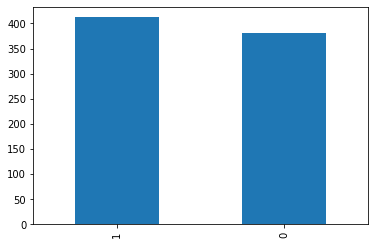

In [7]:
tdf['label'].value_counts().plot(kind = 'bar')

In [8]:
sup = []
for x in tdf['supporter']:
    x.replace(",", "")
    sup.append(x)
tdf.insert(2,'supporter_prep',sup)
# db 다 지우고 integer 로 다시
        

In [9]:
tdf['supporter_prep']

0          1
1         47
2      2,404
3      4,020
4        954
       ...  
788        6
789        1
790        0
791        0
792        4
Name: supporter_prep, Length: 793, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

C:\Users\pc\anaconda3\envs\py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\pc\anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\pc\anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(tdf[['numofpic','community','news','supporter']],tdf['label'],test_size=0.2,shuffle=True,stratify=tdf['label'],random_state=11)

In [ ]:
x_train[:5]

In [ ]:
x_train.shape

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model=Sequential()
model.add(LSTM(64,
               input_shape=(1,x_train.shape[1]),
               activation='relu'
              )
         )
model.add(Dense(1))
model.summary()

In [ ]:
x_train=np.asarray(x_train).astype(np.int)
y_train=np.asarray(y_train).astype(np.int)

In [ ]:
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) # 4회이상 val_loss 증가시 ealry stop
# mc = ModelCheckpoint('mecab_2', monitor='val_acc', mode='max', verbose=1, save_best_only=True) # 정확도가 높아지는 경우에만 모델저장

In [67]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=20,  callbacks=None, batch_size=60, validation_split = 0.2)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

NameError: name 'history' is not defined

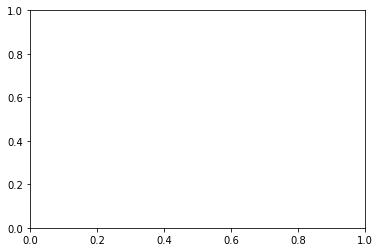

In [68]:
accu = plt.subplot()

# loss.plot(history.history['loss'], 'y', label='loss')
# loss.plot(history.history['val_loss'], 'r', label='val loss')
# loss.set_xlabel('epoch')
# loss.legend(loc='upper left')

accu.plot(history.history['acc'], 'b', label='acc')
accu.plot(history.history['val_acc'], 'g', label='val_acc')
accu.set_xlabel('epoch')
accu.legend(loc='upper left')

accu.plot(history.history['loss'], 'r', label='loss')
accu.plot(history.history['val_loss'], 'y', label='val_loss')
accu.set_xlabel('epoch')
accu.legend(loc='upper left')

plt.show()

In [51]:
# def tknWord(txt):
#     kkma=Kkma()
#     kpos=kkma.pos(txt)
#     cate=['NNG','MAG','VV','NNP','NNB','VA','VCP','VCN','MAC']
#     tkn=[]
#     #print(kpos)
#     for k in kpos:
#         if(k[1] in cate):
#             if(len(k[0])>1):
#                 tkn.append(k[0])
#     return tkn

def tknWord(txt,cntlimit=0):
    kpos=tagger.pos(txt)
    cate=['NNG','MAG','VV','NNP','NNB','VA','VCP','VCN','MAC','MAJ','SF','VV+EC','VV+EP','EP','XR','VV+ETM']
    tkn=[]
    #print(kpos)
    for k in kpos:
        if(k[1] in cate):
            if(len(k[0])>cntlimit):
                tkn.append(k[0])
    return tkn

In [52]:
stopwordsstr = '아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓'

In [53]:
# 불용어 제거
stopwords = stopwordsstr.split()

In [54]:
x_train= x_train.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z ]","")
# 한글과 공백을 제외하고 모두 제거
x_train[:5]

C:\Users\pc\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


525    이태리 BUTTERO 가죽  알루미늄 케블라 센트클래식 차량용 방향제    이태리 ...
181    남녀노소 누구나 입기만 하면 복부  하체 운동 끝 ㅣEMS 레깅스    EMS 전문...
517    전동킥보드에 방향지시등까지 부품 하나까지 프리미엄인 안전 전동킥보드    매년 전동...
549    헤드무게 느끼는 그립력 골프장갑 레온 골프장갑    당신의 그립은 안녕하십닌까올바른...
579    좋은 채는 스승이다    주말골퍼들도 스트레스 받지 않고 퍼팅을 즐길수 있는 퍼터를...
Name: text, dtype: object

In [55]:
from eunjeon import Mecab
tagger=Mecab()

In [56]:
rn=np.ravel(x_train)
x_train_prep = []
for sentence in x_train:
    #temp_X = okt.morphs(sentence, stem=True)
    temp_X = tknWord(sentence)
    temp_X_tr_stop = [word for word in temp_X if not word in stopwords] # 불용어 제거
    x_train_prep.append(temp_X_tr_stop)

In [57]:
x_train_prep[0]

['이태리',
 '가죽',
 '알루미늄',
 '센트',
 '클래식',
 '차량',
 '방향제',
 '이태리',
 '가죽',
 '알루미늄',
 '만남',
 '소재',
 '디자인',
 '차량',
 '방향제',
 '센트',
 '클래식',
 '펀딩',
 '성공',
 '목표',
 '금액',
 '첫날',
 '하루',
 '달성',
 '프로젝트',
 '오픈',
 '기대',
 '반',
 '걱정',
 '반',
 '었',
 '기존',
 '제품',
 '센트',
 '오케스트라',
 '원활',
 '해외',
 '수출',
 '국내',
 '정규',
 '판매',
 '시작',
 '축적',
 '제작',
 '노하우',
 '품질',
 '관리',
 '보완',
 '운영',
 '한껏',
 '발휘',
 '프로젝트',
 '성숙',
 '노련',
 '프로젝트',
 '운영',
 '었',
 '한편',
 '새로',
 '선보이',
 '될',
 '센트',
 '클래식',
 '장점',
 '매력',
 '서포터',
 '분',
 '충분히',
 '어필',
 '걱정',
 '었',
 '걱정',
 '바',
 '달리',
 '서포터',
 '분',
 '성원',
 '시',
 '관심',
 '가져',
 '용기',
 '얻',
 '었',
 '남',
 '제품',
 '개발',
 '일정',
 '더욱',
 '힘내',
 '끝',
 '만족',
 '제품',
 '보답',
 '겠',
 '분',
 '응원',
 '진심',
 '감사',
 '드립니다',
 '이탈리아',
 '최고',
 '인정받',
 '가죽',
 '태',
 '너리',
 '프랑스',
 '원피',
 '가공',
 '가죽',
 '항공',
 '자동차',
 '고급',
 '산업',
 '소재',
 '쓰이',
 '알루미늄',
 '정밀',
 '가공',
 '통해',
 '통째',
 '깎',
 '았',
 '샤넬',
 '랄프로렌',
 '킴',
 '카다시안',
 '유명',
 '브랜드',
 '향료',
 '만든',
 '세계',
 '위',
 '향료',
 '보단',
 '코',
 '스메',
 '등급',
 '향료',
 '었',
 '찍',
 '플라

In [58]:
rn=np.ravel(x_test)
x_test_prep = []
for sentence in x_test:
    #temp_X = okt.morphs(sentence, stem=True)
    temp_X = tknWord(sentence)
    temp_X_tst_stop = [word for word in temp_X if not word in stopwords] # 불용어 제거
    x_test_prep.append(temp_X_tst_stop)

In [59]:
x_test_prep[0]

['만든',
 '방한',
 '양말',
 '롱',
 '패딩',
 '부럽',
 '.',
 '최강',
 '방한',
 '양말',
 '만든',
 '방한',
 '양말',
 '롱',
 '패딩',
 '부럽',
 '.',
 '최강',
 '방한',
 '양말',
 '매년',
 '대한민국',
 '.',
 '점점',
 '겨울옷',
 '무섭',
 '유행',
 '롱',
 '패딩',
 '겨울',
 '발',
 '따뜻',
 '필요',
 '.',
 '아무리',
 '몸',
 '따뜻',
 '발',
 '추위',
 '느끼',
 '.',
 '양말',
 '신어',
 '추위',
 '그대로',
 '답답',
 '발',
 '땀',
 '차',
 '.',
 '시작',
 '.',
 '겨울',
 '추위',
 '막',
 '위한',
 '다양',
 '제품',
 '었',
 '.',
 '양말',
 '었',
 '.',
 '겨울철',
 '발',
 '따뜻',
 '보호',
 '양말',
 '필요',
 '였',
 '.',
 '보온',
 '위한',
 '고급',
 '소재',
 '찾',
 '았',
 '일상',
 '생활',
 '겨울철',
 '스포츠',
 '활동',
 '착용',
 '소재',
 '품질',
 '대한',
 '연구',
 '시작',
 '었',
 '.',
 '디즈',
 '선보이',
 '보온',
 '넘어선',
 '방한',
 '양말',
 '!',
 '리워드',
 '소개',
 '.',
 '호주',
 '청정',
 '지역',
 '양',
 '방목',
 '최적',
 '장소',
 '.',
 '호주',
 '전역',
 '양',
 '메리노',
 '양',
 '.',
 '메리노',
 '?',
 '메리노',
 '울',
 '터치',
 '우수',
 '보드랍',
 '원사',
 '너무',
 '가늘',
 '국내',
 '양말',
 '제작',
 '함유량',
 '내외',
 '불과',
 '였',
 '.',
 '간',
 '연구',
 '제품',
 '테스트',
 '과정',
 '거쳐',
 '메리노',
 '울이',
 '함유',
 '고급',
 '양말',
 '개발',
 '였',
 '.',
 '

In [60]:
y_train

525    0
181    1
517    0
549    0
579    0
      ..
761    0
505    0
534    0
124    1
416    0
Name: label, Length: 609, dtype: int64

In [61]:
# https://julee23.tistory.com/15

In [62]:
# 'utf-8' codec can't decode byte 0xed in position 0: invalid continuation byte

In [63]:
x_train_prep[:1]

[['이태리',
  '가죽',
  '알루미늄',
  '센트',
  '클래식',
  '차량',
  '방향제',
  '이태리',
  '가죽',
  '알루미늄',
  '만남',
  '소재',
  '디자인',
  '차량',
  '방향제',
  '센트',
  '클래식',
  '펀딩',
  '성공',
  '목표',
  '금액',
  '첫날',
  '하루',
  '달성',
  '프로젝트',
  '오픈',
  '기대',
  '반',
  '걱정',
  '반',
  '었',
  '기존',
  '제품',
  '센트',
  '오케스트라',
  '원활',
  '해외',
  '수출',
  '국내',
  '정규',
  '판매',
  '시작',
  '축적',
  '제작',
  '노하우',
  '품질',
  '관리',
  '보완',
  '운영',
  '한껏',
  '발휘',
  '프로젝트',
  '성숙',
  '노련',
  '프로젝트',
  '운영',
  '었',
  '한편',
  '새로',
  '선보이',
  '될',
  '센트',
  '클래식',
  '장점',
  '매력',
  '서포터',
  '분',
  '충분히',
  '어필',
  '걱정',
  '었',
  '걱정',
  '바',
  '달리',
  '서포터',
  '분',
  '성원',
  '시',
  '관심',
  '가져',
  '용기',
  '얻',
  '었',
  '남',
  '제품',
  '개발',
  '일정',
  '더욱',
  '힘내',
  '끝',
  '만족',
  '제품',
  '보답',
  '겠',
  '분',
  '응원',
  '진심',
  '감사',
  '드립니다',
  '이탈리아',
  '최고',
  '인정받',
  '가죽',
  '태',
  '너리',
  '프랑스',
  '원피',
  '가공',
  '가죽',
  '항공',
  '자동차',
  '고급',
  '산업',
  '소재',
  '쓰이',
  '알루미늄',
  '정밀',
  '가공',
  '통해',
  '통째',
  '깎',
  '았',
  '샤넬',


리뷰의 최대 길이 : 2329
리뷰의 평균 길이 : 596.5418719211823


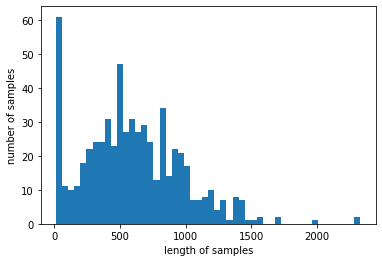

In [64]:
print('리뷰의 최대 길이 :',max(len(l) for l in x_train_prep))
print('리뷰의 평균 길이 :',sum(map(len, x_train_prep))/len(x_train_prep))
plt.hist([len(s) for s in x_train_prep], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [65]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [66]:
below_threshold_len(1250, x_train_prep)

전체 샘플 중 길이가 1250 이하인 샘플의 비율: 94.7454844006568


In [67]:
below_threshold_len(1000, x_train_prep)

전체 샘플 중 길이가 1000 이하인 샘플의 비율: 86.5353037766831


In [68]:
from keras.preprocessing.text import Tokenizer

In [69]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train_prep)

In [70]:
print(tokenizer.word_index)

{'펀딩': 1, '사용': 2, '제품': 3, '시': 4, '운동': 5, '가능': 6, '었': 7, '리워드': 8, '분': 9, '서포터': 10, '통해': 11, '개발': 12, '배송': 13, '디즈': 14, '프로젝트': 15, '겠': 16, '결제': 17, '제작': 18, '진행': 19, '위해': 20, '페이지': 21, '안전': 22, '마감': 23, '였': 24, '시작': 25, '디자인': 26, '다양': 27, '기능': 28, '문의': 29, '발송': 30, '해': 31, '확인': 32, '변경': 33, '교환': 34, '자전거': 35, '발생': 36, '스포츠': 37, '가장': 38, '이후': 39, '착용': 40, '방법': 41, '차': 42, '골프': 43, '필요': 44, '쉽': 45, '밴드': 46, '생산': 47, '매트': 48, '사이즈': 49, '효과': 50, '보드': 51, '정책': 52, '위한': 53, '메이커': 54, '보호': 55, '금': 56, '예정': 57, '부분': 58, '해당': 59, '소재': 60, '배터리': 61, '근육': 62, '차량': 63, '자세': 64, '았': 65, '브랜드': 66, '카드': 67, '추가': 68, '몸': 69, '제공': 70, '발': 71, '기존': 72, '기간': 73, '건강': 74, '양말': 75, '대한': 76, '딩': 77, '자동차': 78, '가격': 79, '국내': 80, '허리': 81, '반환': 82, '기술': 83, '없이': 84, '성공': 85, '주행': 86, '정보': 87, '맞': 88, '또는': 89, '드립니다': 90, '잡': 91, '일반': 92, '취소': 93, '관리': 94, '문': 95, '이용': 96, '더욱': 97, '직접': 98, '코팅': 99, '사유': 100, '높': 101

In [71]:
# 토큰화
threshold = 3
total_cnt = len(tokenizer.word_index) 
print(total_cnt)# 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

15442
단어 집합(vocabulary)의 크기 : 15442
등장 빈도가 2번 이하인 희귀 단어의 수: 7120
단어 집합에서 희귀 단어의 비율: 46.10801709623106
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.536788386265669


In [72]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 8323


In [73]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(x_train_prep)
x_train = tokenizer.texts_to_sequences(x_train_prep)
x_test = tokenizer.texts_to_sequences(x_test_prep)

In [74]:
x_train[:10]

[[2843,
  221,
  859,
  1629,
  1435,
  63,
  678,
  2843,
  221,
  859,
  2844,
  60,
  26,
  63,
  678,
  1629,
  1435,
  1,
  85,
  288,
  257,
  155,
  621,
  15,
  216,
  743,
  773,
  294,
  773,
  7,
  72,
  3,
  1629,
  3714,
  1937,
  289,
  1072,
  80,
  4152,
  211,
  25,
  2504,
  18,
  889,
  261,
  94,
  676,
  539,
  1390,
  15,
  7103,
  15,
  539,
  7,
  3715,
  1978,
  422,
  273,
  1629,
  1435,
  505,
  1244,
  10,
  9,
  821,
  4427,
  294,
  7,
  294,
  783,
  178,
  10,
  9,
  822,
  4,
  303,
  1890,
  2021,
  479,
  7,
  561,
  3,
  12,
  224,
  97,
  247,
  290,
  3,
  1113,
  16,
  9,
  305,
  832,
  131,
  90,
  2845,
  282,
  784,
  221,
  5090,
  6228,
  2346,
  3716,
  729,
  221,
  3717,
  78,
  291,
  1098,
  60,
  1558,
  859,
  1784,
  729,
  11,
  5091,
  65,
  4153,
  5583,
  1020,
  6229,
  846,
  66,
  1391,
  396,
  174,
  117,
  1391,
  833,
  1046,
  1391,
  7,
  1487,
  609,
  1158,
  1703,
  47,
  479,
  1629,
  1435,
  3202,
  1436,
  3203,


In [75]:
len(x_train[0])

1243

In [76]:
def padding(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print((max_len, (cnt / len(nested_list))))

In [77]:
max_len = 1000
padding(max_len,x_train)

(1000, 0.8817733990147784)


In [78]:
from keras.preprocessing.sequence import pad_sequences

In [79]:
x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

In [80]:
x_train.shape

(609, 1000)

In [81]:
x_test.shape

(153, 1000)

In [82]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [111]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(256))
model.add(Dense(1, activation='sigmoid'))

In [112]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) # 4회이상 val_loss 증가시 ealry stop
mc = ModelCheckpoint('mecab_2', monitor='val_acc', mode='max', verbose=1, save_best_only=True) # 정확도가 높아지는 경우에만 모델저장

In [113]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=20,  batch_size=60, validation_split = 0.2)

Epoch 1/20
9/9 [==============================] - 44s 5s/step - loss: 0.6899 - acc: 0.5257 - val_loss: 0.6870 - val_acc: 0.5492
Epoch 2/20
9/9 [==============================] - 44s 5s/step - loss: 0.8785 - acc: 0.7084 - val_loss: 0.6828 - val_acc: 0.6148
Epoch 3/20
9/9 [==============================] - 44s 5s/step - loss: 0.5250 - acc: 0.8296 - val_loss: 1.0599 - val_acc: 0.5984
Epoch 4/20
9/9 [==============================] - 49s 5s/step - loss: 0.4788 - acc: 0.8316 - val_loss: 1.9571 - val_acc: 0.5984
Epoch 5/20
9/9 [==============================] - 52s 6s/step - loss: 0.5326 - acc: 0.8480 - val_loss: 0.7628 - val_acc: 0.5902
Epoch 6/20
9/9 [==============================] - 53s 6s/step - loss: 0.2966 - acc: 0.8850 - val_loss: 0.8382 - val_acc: 0.6230
Epoch 7/20
9/9 [==============================] - 53s 6s/step - loss: 0.2519 - acc: 0.9117 - val_loss: 1.0465 - val_acc: 0.5902
Epoch 8/20
9/9 [==============================] - 55s 6s/step - loss: 0.2203 - acc: 0.9179 - val_loss: 1

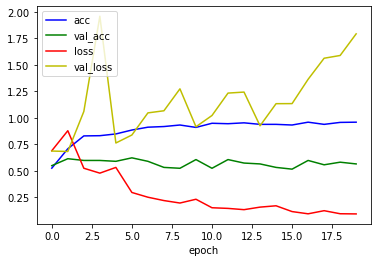

In [114]:
accu = plt.subplot()

# loss.plot(history.history['loss'], 'y', label='loss')
# loss.plot(history.history['val_loss'], 'r', label='val loss')
# loss.set_xlabel('epoch')
# loss.legend(loc='upper left')

accu.plot(history.history['acc'], 'b', label='acc')
accu.plot(history.history['val_acc'], 'g', label='val_acc')
accu.set_xlabel('epoch')
accu.legend(loc='upper left')

accu.plot(history.history['loss'], 'r', label='loss')
accu.plot(history.history['val_loss'], 'y', label='val_loss')
accu.set_xlabel('epoch')
accu.legend(loc='upper left')

plt.show()


In [115]:
pred = model.predict(x_test)


In [116]:
len(pred)

153

In [117]:
pred

array([[1.94519758e-04],
       [9.99587476e-01],
       [5.80421865e-01],
       [9.96857345e-01],
       [7.62695670e-01],
       [1.96366966e-01],
       [9.95561242e-01],
       [9.28351104e-01],
       [2.83965468e-03],
       [9.14225817e-01],
       [9.53553438e-01],
       [6.40843809e-01],
       [9.99748468e-01],
       [9.19835925e-01],
       [9.99195337e-01],
       [1.64255500e-03],
       [1.89220071e-01],
       [9.26396966e-01],
       [2.67207623e-04],
       [9.96747732e-01],
       [1.94638968e-04],
       [9.69778359e-01],
       [3.75463068e-02],
       [1.88435972e-01],
       [2.65340805e-02],
       [9.99455154e-01],
       [9.95441973e-01],
       [7.10344791e-01],
       [2.61248708e-01],
       [5.84343612e-01],
       [9.99936223e-01],
       [3.52035999e-01],
       [1.22181177e-02],
       [9.85312402e-01],
       [2.82014906e-01],
       [2.96040356e-01],
       [2.66339302e-01],
       [2.76955962e-02],
       [1.79611653e-01],
       [9.09526765e-01],


In [118]:
cnt = 0
for p in pred:
    print(p[0])
    if p[0] > 0.5:
        cnt += 1 
    else:
        continue
print("테스트 데이터 예상 성공률",cnt/len(pred))


0.00019451976
0.9995875
0.58042186
0.99685735
0.76269567
0.19636697
0.99556124
0.9283511
0.0028396547
0.9142258
0.95355344
0.6408438
0.99974847
0.9198359
0.99919534
0.001642555
0.18922007
0.92639697
0.00026720762
0.99674773
0.00019463897
0.96977836
0.037546307
0.18843597
0.02653408
0.99945515
0.995442
0.7103448
0.2612487
0.5843436
0.9999362
0.352036
0.012218118
0.9853124
0.2820149
0.29604036
0.2663393
0.027695596
0.17961165
0.90952677
0.99963903
0.9963633
0.94381773
0.017150283
0.80569017
0.8750443
0.031029165
0.27895224
0.89105266
0.921075
0.0030035079
0.6235033
0.10452217
0.99305284
0.019217342
0.7828683
0.9996304
0.19102728
0.0034207106
0.012933701
0.9752139
0.56803864
0.018448055
0.62186223
0.9662628
0.73792636
0.00030580163
0.0009966791
0.67183757
0.25023594
0.7173972
0.0051511824
0.019638002
0.95676214
0.9930421
0.9680656
0.99994624
0.02017349
0.5935435
0.09542242
0.9997393
0.9982684
0.2671368
0.99180186
0.034856677
0.0018259585
0.057543963
0.42337292
0.9995475
0.8375846
0.001722

In [119]:
eva = model.evaluate(pred, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.6945 - acc: 0.5163


In [120]:
print(eva)

[0.6944683790206909, 0.516339898109436]


In [94]:
model.save("mecab_500")

INFO:tensorflow:Assets written to: mecab_500\assets


INFO:tensorflow:Assets written to: mecab_500\assets


In [95]:
loaded_model = load_model("mecab_500")

In [96]:
def sentiment_predict(new_sentence):
    new_sentence = tknWord(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    # print(new_sentence)
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    print(score)
    if(score > 0.5):
        print('성공')
    else:
        print('실패')

In [97]:
# 앵콜펀딩 [13018%앵콜] 3만원대 스포츠웨어 이시국에 헬스장 공용복 입으세요? https://www.wadiz.kr/web/campaign/detail/89464
sports = '''

    부담되는 값비싼 스포츠브랜드, 오래 입을 수 있는 퀄리티, 기능성을 모조 리 때려 박은 스포츠웨어 싸구려 중국산이 아닌 스포츠웨어 전문 공장에서 직접 생산 하였습니다.
    
          반바지는 하체 근육을 잡아주지 못 할까...? 운동 선수들이 레깅스를 입는 이유  어떤 운동이든, 어떤 중량이든, 어떤 고립감이든 자유롭게 운동하세요~! (리얼 후기) 남자들이라면, 공감하는 땀이 차는 사타구니  냄새 or 습집에 가장 큰 원인은 땀 입니다. 땀이 많이 날수록 통기성이 좋은 옷을 선택 해야 합니다 땀으로 인해 습한상태가 지속되면 곰팡이균이 생성되며 사타구니 습진에 걸립니다. * 온도가 상승하게 되면 배우자나 다른 신체부위로 옮아가는 경우가 있음 *       운동인이라면 지켜야하는 매너!  겉감이 방수로 되어 땀이 많이 나더라도 묻어나지 않습니다. (매너있는 운동인)  겉감도 신축성이 좋아 빳빳한 느낌이 없습니다.       땀이 나면 티나는 겨땀! 일반 면T(겨드랑이 땀);;;;;;   통기성 없어서 답답하고 유독 튀어나온 제3의 눈   땀이 묻어 돌아오지 않는 티..몇번  빨았더니 다 늘어났...ㅡ,ㅡ  땀이 닿는 순간 빠르게 건조  *흡한속건*  타사 23도 vs 바벨러 18도 열 화상 TEST : 땀 배출 99% 통기성으로  쿨링감을 느끼실 수 있습니다.    국가대표 팀 제작 공장에서 직접 제작!        허벅지 두께가 보통이라고 생각하시면 m, 두꺼운 편이시면 L을 선택해주세요. 완전 압박으로 입으실꺼면 사이즈 다운 하셔도 됩니다. / 사이클를 하여 다리가 두꺼운 편이시면! L 선택! 겉감 / 안감 신축성이 좋아, 많이 두꺼우신분들엔 타이트한 느낌을 받아 좋습니다. * 여성분들은 M 사이즈로 입으셔도 무관 합니다.           리워드 구성은 하단을 참고해 주세요.     리워드 발송 시작일 : 10월 28일 펀딩이 종료된후 4일간 결제 후 10월 28일부터 초기 생산분에 대해 순차적 즉시 발송 일일 최대 100장 초기 생산분 재고 품절시 제작기간 약 2주 소요되며, 새소식을 통해 생산/재고 현황을 알려드립니다. 1) 리워드 하자가 아닌 경우 리워드의 특성상, 아래의 항목들이 발생할 수 있으며 이는 리워드의 하자/불량이 아닙니다. 펀딩 시 이 점을 유의해주세요.  리워드 수령으로부터 7일 이내에 발생한 초기 하자에 대해서는 본 A/S정책이 적용되지 않습니다.   펀딩금은  국내 스포츠웨어 브랜드가 해외 브랜드보다 높은 퀄리티의 제품을 제작 할 수있다는것을 보여드리고 싶었으며, 서포터분들께  합리적인 가격으로 기능성 스포츠웨어를 개발하고 제공하기 위해 사용될 예정이며, 많은 분들에게 소개 될 수 있도록 앵콜 펀딩에 참여 부탁드리며, 원가를 낮추고 퀄리티는 높이며 서포터분들께 합리적인 리워드를 제공하는데 사용될 예정입니다. Q: 바벨러 스포츠웨어는 남성용 인가요? 네  남성용 제작 되었습니다. 하지만 여성고객분들도 상의 M 사이즈(오버핏) 맞으십니다. 하의는 M 사이즈가 맞으시며, 앵콜 펀딩 후 더 마르신 분들을 위해 S 사이즈 패턴도 준비 되어 있습니다.  Q: 펀딩 종료 후에도 구매할 수 있나요? 와디즈 앵콜 펀딩또는, 기타 플랫폼을 통해 발매예정입니다. 자사몰/기타 플랫폼 런칭시에는 와디즈 펀딩가가 아닌 정상가에 판매됩니다.  Q: 바벨러 스포츠 웨어는 더 큰사이즈나 작은사이즈는 없나요? S~2XL사이즈까지  패턴이 준비되어 있으며, 많은 요청이 생기면 금번 펀딩이 끝나고 앵콜펀딩또는 기타 플랫폼을 통해 추가로 출시할 예정입니다.  Q: 펀딩 후, 옵션/배송지/카드 정보 변경은 어떻게 해야하나요? 펀딩 마감일 전까지 '펀딩내역' 페이지에서 수정하실 수 있습니다. 펀딩 마감 이후, 불가피한 사유로 배송지 변경하셔야 하는 분은 해당 페이지 내 '메이커에게 문의하기'를 통해서 문의해 주세요.  Q: 교환/펀딩금 반환 규정은 어떻게 되나요? - 서포터님에 의한 제품, 택 멸실, 훼손 또는 오염되었을 경우 펀딩금 반환/교환이 불가합니다. 제품 및 포장 상태가 재판매 가능하여야 합니다.
'''

In [98]:
sentiment_predict(sports)

0.9466444253921509
성공


In [99]:
# 앵콜실패 펀딩 나를 위한 스포츠 마스크! 필터 교체형 올인원마스크 https://www.wadiz.kr/web/campaign/detail/29440
sports_2 ='''

    나를 지켜주는 스포츠 마스크 <올인원마스크>
올인원마스크는 필터 교체형 마스크로 먼지 마스크와 목토시를 하나로 결합한 스포츠 마스크입니다.
    
   왜 사람들은 운동할 때  고가의 운동장비는 구매하면서 나를 지켜주는 운동장비는  구매하지 않을까요?   먼지와 자외선을 막기 위해 두 가지 마스크를 착용하고 운동한 적 없으신가요? 실외 운동 시 더 이상 일반 마스크 착용은 그만! 실외 운동을 좋아하시는 분들의 고민을 덜어줄 스포츠 마스크! 마스크와 넥워머를 하나로 결합한 스포츠 마스크! 실외 먼지와 자외선으로부터 한 번에 지켜주는 필터 교체형 마스크 <올인원마스크>를 소개합니다!     저는 저처럼 야외활동을 즐기는 사람들, 실외 운동을 좋아하는 사람들에게 이불 밖에서도 안전한 스포츠 마스크를 만들고 싶었습니다. 운동을 하는 사람들을 관찰하며 아이디어를 얻기 시작했고, 관찰한 결과 대부분 일반 마스크를 착용하거나 넥워머에 마스크를 덧대어 사용하고 있다는 사실을 발견했습니다.     저는 운동하는 사람들을 위한 스포츠 마스크가 아직 없다는 사실을 발견했고, 그때부터 수개월간 전문가들과 함께 저의 아이디어를 실현시키기 위해 노력했습니다. 그리고 드디어 와디즈를 통해 저처럼 액티비티한 활동을 좋아하는 사람들을 위한 나를 위한 스포츠 마스크! 바로 <올인원마스크>를 선보이게 되었습니다.      운동하세요?  올인원마스크하세요!     오늘은 어떤 운동을 하셨나요? 러닝? 자전거? 등산? 골프? 이제 올인원마스크만 있다면 어떤 운동도 걱정 없습니다. 올인원마스크로 좋아하는 운동을 마음껏 즐기세요.    운동하는 사람들 사이에서  입소문 나고 있는  올인원마스크     ■ 올인원마스크 필터 삽입 방법 올인원마스크는 필터 교체형 스포츠 마스크로 필터를 자유롭게 교체하며 반영구적으로 사용하실 수 있습니다. 자세한 필터 삽입 방법은 영상으로 확인하실 수 있습니다.    기능과 디자인을 한 번에 잡은 올인원마스크 3가지 매력    올인원마스크에서 사용하는 교체형 필터는 0.3micron입자 크기의 실외 먼지를 97%까지 걸러줍니다.  원통에 미세한 가루를 넣고 강한 압력의 에어를 불어넣었을 때 투과율을 확인하는 실험 영상입니다. 숯을 곱게 갈아 원통 안에 넣고, 원통 끝에는 교체형 필터를 삽입한 올인원마스크로 막았습니다. 강한 압력의 에어를 불어넣자 높은 차단율을 보이는 것을 확인할 수 있었습니다.     올인원마스크는 자외선 UV 99.9%까지 차단한다는 시험성적서를 받았습니다. 최근 봄철 자외선량이 급증함과 더불어 건조한 대기 상태로 피부가 더 예민해지고 본연의 방어 기능도 약해져 피부 손상이 늘어나고 있습니다. 올인원마스크는 자외선 차단을 위한 기능성 스포츠 마스크입니다.      올인원마스크는 뛰어난 수분흡수력으로 실외 운동 시 땀을 흘려도 빠르게 건조해 언제나 뽀송뽀송한 상태를 유지시켜 줍니다.       올인원마스크  액티비티를 생각하는 3가지 디자인        가성비 인정 올인원마스크                 안녕하세요, 와디즈 서포터 여러분! 액티서리의 정민석입니다. 액티서리는 Activity 와 Accessory의 합성어로 멋과 기능을 모두 놓치지 않는 스포츠 브랜드입니다. 액티서리가 있기 전까지 저는 호감FC에서 축구를 하며 친구들과 실외 운동을 즐기는 평범한 대학생이었습니다. 저는 사람들과 축구를 하는 시간이 좋았지만, 축구를 마음 놓고 할 수 있는 시간이 점점 줄어들기 시작했습니다.  그때 저는 환경이 얼마나 저의 삶에 영향을 많이 미치는지를 깨닫게 되었고, 무언가 제가 할 수 있는 일을 해보자고 생각했습니다. 그리고 제 머릿속에 떠올랐던 <올인원마스크>를 개발하게 되었습니다.     하지만 <올인원마스크>가 세상에 나오기까지 생각보다 꽤 오랜 시간이 걸렸습니다. 모든 것들이 처음이었던 저에게는 마스크를 개발하기 위해 마스크를 전문으로 제작하는 공장을 알아보러 다니고, 디자이너를 구하고, 창업 자금을 마련하기 위한 지원 사업까지 쉽지 않았습니다. 하지만 <올인원마스크>가 이렇게 와디즈에서 서포터분들을 만나게 될 거라고 생각하자 지금 많이 두근거립니다. 와디즈에서 펀딩을 하려는 이유는 제가 이렇게 오랫동안 고민하며 개발한 <올인원마스크>를 저처럼 실외 운동을 즐기는 사람들에게 소개하고 마음껏 실외 운동을 같이 즐기기 위해서입니다. 제가 앞으로 더욱 용기를 얻을 수 있도록 많은 응원과 후원 부탁드리겠습니다.     Q. 올인원마스크 세탁은 어떻게 하나요?   A. 1. 우선 미지근한 물에 중성세제 또는 울샴푸를 풀어 5분간 담가주세요.       2. 코 와이어를 주의하여 비틀지 않고 가볍게 주무르듯이 세탁해주세요.       3. 마지막으로 깨끗한 물에 헹궈 가볍게 물기를 제거한 후 그늘에 말려주세요.   Q. 필터의 기능은 어떤가요?A. 필터인증서를 보시면 우리가 흔히 알고 있는 pm2.5의 2.5micron보다도 8배 작은 0.3micron으로 실험하여 97%의 차단율을 보여주고 있습니다. 0.3micron의 크기는 머리카락의 166분의 1의 크기로 코로 걸러지지 않는 크기입니다. 따라서 먼지 제거에 효과가 있습니다.  Q. 필터도 세탁하여 재사용할 수 있나요?  A. 필터는 재사용을 권장하고 있지 않습니다.  필터를 세탁하여 사용하시면 기능이 저하되므로 필터는 사용 후 버려주시는 게 가장 좋습니다.  Q. 필터 교환은 얼마나 자주 해야 하나요?  A. 필터는 8시간 사용을 권장하고 있습니다. 일반적으로 2~3일 사용이 가능합니다.   Q . 필터는 어디서 구매할 수 있나요?  A. 와디즈 펀딩 마감 이후 액터서리 홈페이지 및 오픈마켓을 통해 구매하실 수 있도록 준비 예정입니다.   Q . 올인원마스크 착용 시 호흡이 불편하지는 않나요?  A. 호흡을 원활하게 하실 수 있도록 최고급 필터를 사용하였습니다. 마스크 역시 매쉬원단을 사용하여 호흡량이 많아도 편안하게 착용하실 수 있습니다. 단, 산소 농도가 낮은 곳에서는 사용을 권장하고 있지 않습니다. (호흡에 대한 기준은 개인적일 활동량 및 환경에 따라 다를 수 있습니다.)   Q. 올인원마스크는 남녀 공용인가요?  A. 올인원마스크는 성인용 마스크로, 신축성 원단을 사용하여 다양한 얼굴 사이즈에 적합하도록 제작되었습니다.   Q. 색상은 검은색 한 가지 색상인가요?  A. 금번에 출시된 올인원마스크는 심플하고 고급스러운 느낌의 검은색을 선택하여 디자인되었습니다. 추후 다양한 색상과 디자인을 고민하여 선보이도록 하겠습니다.   Q. 펀딩 후 옵션, 배송지, 카드 정보 변경 방법 A. 펀딩 마감 이후, 불가피한 사유로 배송지를 변경해야 하는 분은 해당 페이지 내 '메이커에게 문의하기'를 통해서 바로 문의하시기 바라겠습니다. 펀딩 마감일 전까지는 '펀딩 내역' 페이지에서 자유롭게 수정하실 수 있습니다.   Q. 배송비는 얼마인가요?  A. 배송비는 무료이며, CJ대한통운 택배를 통해 순차 배송될 예정입니다.   Q. 교환 및 환불 문의  A. 프로젝트 마감일 전까지 '펀딩 내역' 페이지에서 펀딩 취소가 가능합니다. 단, 마감일 이후에는 취소가 불가능합니다. 제품 결함으로 인한 교환 및 환불은 리워드 수취 후 7일 이내 액티서리에 문의하시면 제품 상태를 확인한 후 처리해드리도록 하겠습니다. 단, 리워드 등 원상태 보존을 원칙으로 합니다. 자세한 교환 및 환불에 대한 정책은 '펀딩 정보' 탭에서 '교환/환불/AS 정책을 확인해주시기 바라겠습니다.    왼쪽부터 올인원마스크 S 시험성적서, 올인원마스크 L 시험성적서, 필터 인증서입니다. *해당 제품은 KF인증을 받은 제품이 아닙니다.
'''

In [100]:
sentiment_predict(sports_2)

0.34407585859298706
실패
